In [2]:
import numpy as np
from tensorflow import keras
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from time import sleep

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[0 1 2 3 4 5 6 7 8 9]


[1]


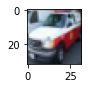

In [4]:
inx = 60
plt.figure(figsize=(1, 1))
plt.imshow(x_train[inx,:,:,:])
print(y_train[inx])

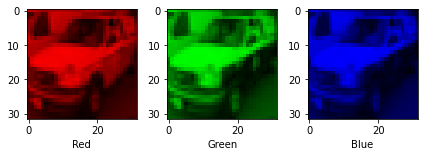

In [5]:
dim = np.zeros((32, 32))

plt.subplot(1, 3, 1)
plt.imshow(np.stack((x_train[inx,:,:,0]/255, dim, dim), axis=2))
plt.xlabel("Red")
plt.subplot(1, 3, 2)
plt.imshow(np.stack((dim, x_train[inx,:,:,1]/255, dim), axis=2))
plt.xlabel("Green")
plt.subplot(1, 3, 3)
plt.imshow(np.stack((dim, dim, x_train[inx,:,:,2]/255), axis=2))
plt.xlabel("Blue")
plt.tight_layout()

In [17]:
import tensorflow as tf
from keras import layers, models, utils
from keras.models import Sequential

x_train = np.reshape(x_train, (-1, 32*32*3))
x_test = np.reshape(x_test, (-1, 32*32*3))

In [18]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train)
# When an unknown category is encountered during
# transform, the resulting one-hot encoded columns
# for this feature will be all zeros.

categories = enc.categories_[0]
print(categories)

y_train_onehot = enc.transform(y_train).toarray()
y_test_onehot = enc.transform(y_test).toarray()

[0 1 2 3 4 5 6 7 8 9]


In [91]:
keras.backend.clear_session()
model = Sequential()
model.add(keras.Input(shape=(32*32*3, )))

In [92]:
n_hidden_layers = 10

for i in range(n_hidden_layers):
    model.add(layers.Dense(100, activation='relu'))

    #tf.keras.layers.BatchNormalization()
model.add(layers.Dropout(0.1))

# model.add(layers.Conv2D(32, (4,4), input_shape=(32,32,3), activation='relu'))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(32, (4,4), input_shape=(32,32,3), activation='relu'))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))


model.add(layers.Dense(10, activation='softmax'))
# The elements of the output vector are in range (0, 1) and sum to 1.

from keras import optimizers

#opt = optimizers.Nadam(0.0005)
opt = optimizers.Adam(0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               1

In [93]:
train_hist = model.fit(x_train, y_train_onehot, batch_size=128,
epochs=25, steps_per_epoch=352,verbose=1, validation_data=(x_test, y_test_onehot), shuffle=True)

Epoch 1/25
352/352 [==============================] - 4s 9ms/step - loss: 2.1638 - accuracy: 0.2225 - val_loss: 1.9233 - val_accuracy: 0.3061
Epoch 2/25
352/352 [==============================] - 3s 8ms/step - loss: 1.8780 - accuracy: 0.3122 - val_loss: 1.8843 - val_accuracy: 0.3268
Epoch 3/25
352/352 [==============================] - 3s 9ms/step - loss: 1.8171 - accuracy: 0.3406 - val_loss: 1.7263 - val_accuracy: 0.3692
Epoch 4/25
352/352 [==============================] - 3s 9ms/step - loss: 1.7464 - accuracy: 0.3692 - val_loss: 1.7360 - val_accuracy: 0.3711
Epoch 5/25
352/352 [==============================] - 3s 9ms/step - loss: 1.7039 - accuracy: 0.3839 - val_loss: 1.6646 - val_accuracy: 0.4034
Epoch 6/25
352/352 [==============================] - 3s 9ms/step - loss: 1.6736 - accuracy: 0.3992 - val_loss: 1.6482 - val_accuracy: 0.4051
Epoch 7/25
352/352 [==============================] - 3s 9ms/step - loss: 1.6453 - accuracy: 0.4095 - val_loss: 1.6196 - val_accuracy: 0.4142
Epoch 

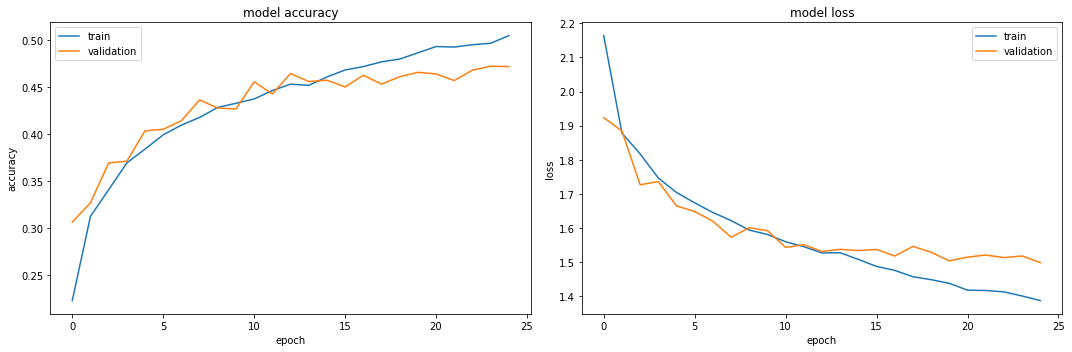

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(train_hist.history['accuracy'])
axs[0].plot(train_hist.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'])

axs[1].plot(train_hist.history['loss'])
axs[1].plot(train_hist.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'])

plt.tight_layout()
plt.show()

In [95]:
loss, acc = model.evaluate(x_test, y_test_onehot, verbose=1)

print("Model's accuracy: {:5.2f}%".format(100*acc))

313/313 [==============================] - 1s 2ms/step - loss: 1.4982 - accuracy: 0.4719
Model's accuracy: 47.19%
